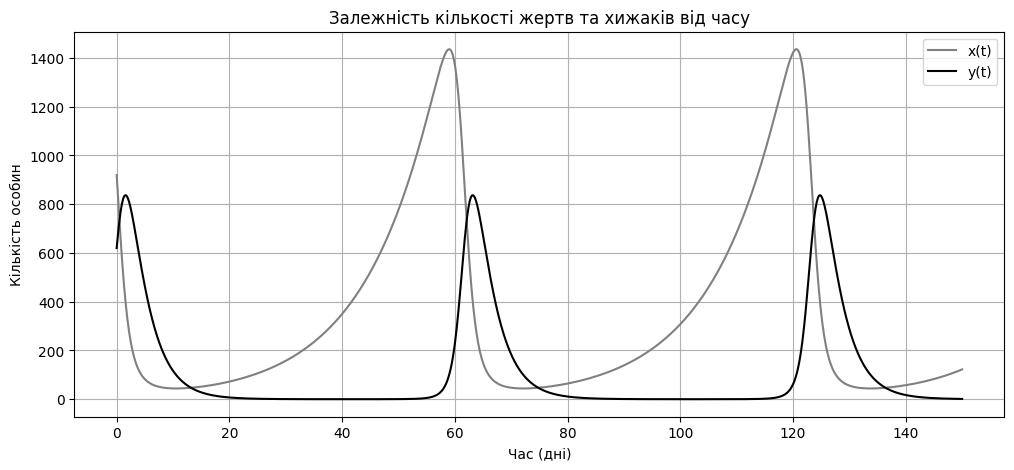

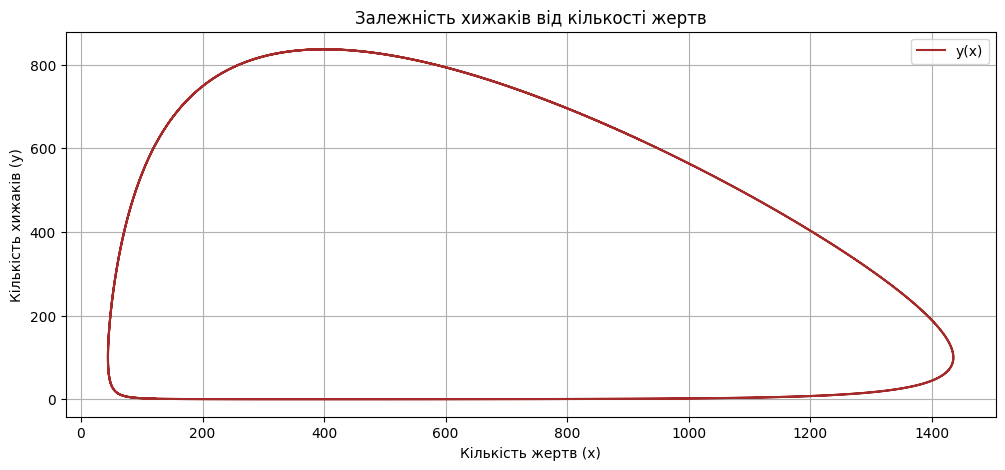

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

N = 8  # Ваш варіант

def modeling_of_ecological_systems():
    a11 = 0.01*N
    a12 = 0.0001*N
    a21 = 0.0001*N
    a22 = 0.04*N

    x0 = 1000 - 10*N
    y0 = 700 - 10*N
    T = 150
    h = 0.1
    t0 = 0

    step = int(T/h)
    t_values = np.linspace(t0, T, step)
    x_values = np.zeros(step)
    y_values = np.zeros(step)

    x_values[0] = x0
    y_values[0] = y0

    def xderivative(x, y):
        return a11*x - a12*x*y

    def yderivative(x, y):
        return a21*x*y - a22*y

    def Runge_kutta(x, y, steps):
        for n in range(steps-1):
            x, y = x_values[n], y_values[n]
            
            k1_x = xderivative(x, y)
            k1_y = yderivative(x, y)
            k2_x = xderivative(x + (h/2)*k1_x, y + (h/2)*k1_y)
            k2_y = yderivative(x + (h/2)*k1_x, y + (h/2)*k1_y)
            k3_x = xderivative(x + (h/2)*k2_x, y + (h/2)*k2_y)
            k3_y = yderivative(x + (h/2)*k2_x, y + (h/2)*k2_y)
            k4_x = xderivative(x + h*k3_x, y + h*k3_y)
            k4_y = yderivative(x + h*k3_x, y + h*k3_y)
            
            x_values[n+1] = x + h/6 * (k1_x + 2*k2_x + 2*k3_x + k4_x)
            y_values[n+1] = y + h/6 * (k1_y + 2*k2_y + 2*k3_y + k4_y)
            
        return t_values, x_values, y_values

    t_values, x_values, y_values = Runge_kutta(x0, y0, step)

    # Графік змін чисельності жертв та хижаків
    plt.figure(figsize=(12, 5))
    plt.plot(t_values, x_values, label='x(t)', color='grey')
    plt.plot(t_values, y_values, label='y(t)', color='black')
    plt.xlabel('Час (дні)')
    plt.ylabel('Кількість особин')
    plt.legend()
    plt.grid()
    plt.title('Залежність кількості жертв та хижаків від часу')
    plt.show()

    # Графік залежності між жертвами і хижаками
    plt.figure(figsize=(12, 5))
    plt.plot(x_values, y_values, label='y(x)', color='brown')
    plt.xlabel('Кількість жертв (x)')
    plt.ylabel('Кількість хижаків (y)')
    plt.legend()
    plt.grid()
    plt.title('Залежність хижаків від кількості жертв')
    plt.show()

modeling_of_ecological_systems()


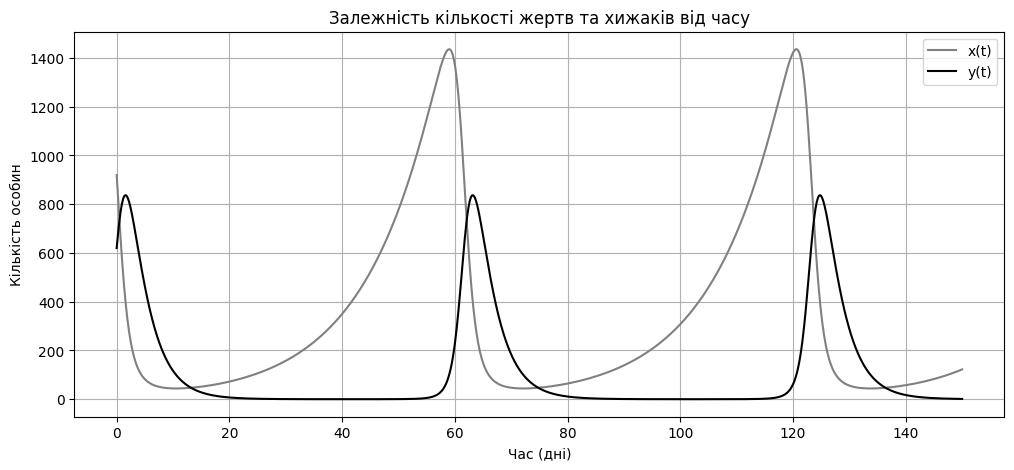

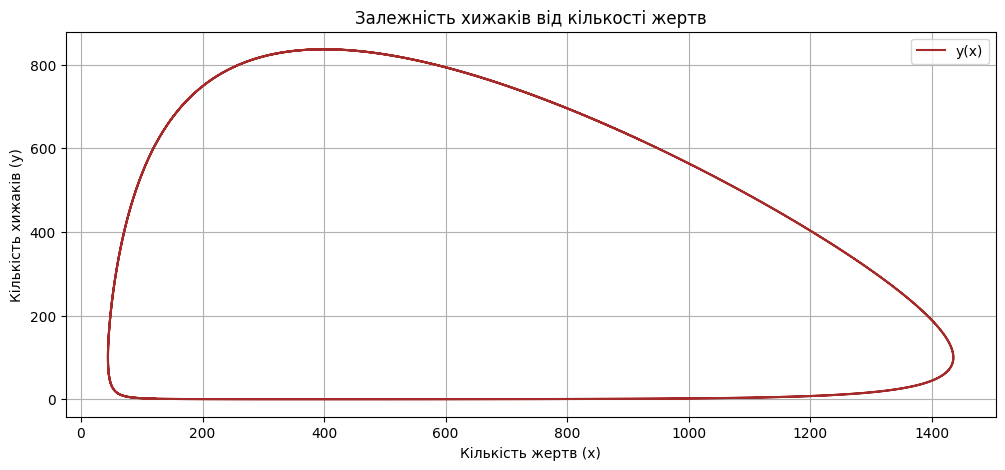

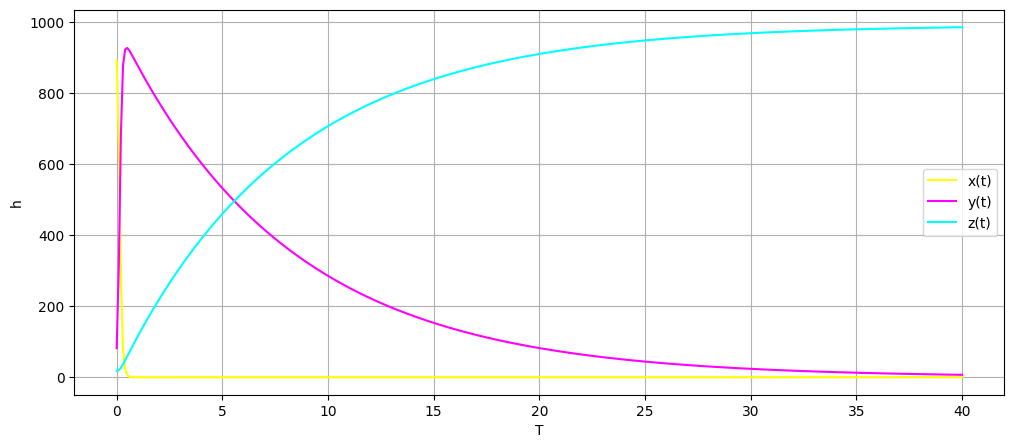

In [2]:
def Modeling_the_spread_of_an_epidemic():
    H = 1000-N
    beta = 25-N
    hama = N
    
    x0 = 900-N
    y0 = 90-N
    z0 = H-x0-y0
    t0 = 0
    h = 0.1
    T = 40
    
    step = int(T/h)
    t_values = np.linspace(t0, T, step)
    x_values = np.zeros(step)
    y_values = np.zeros(step)
    z_values = np.zeros(step)

    x_values[0] = x0
    y_values[0] = y0
    z_values[0] = z0
    
    
    def xderivative(x, y, z):
        return -beta/H*x*y

    def yderivative(x,y,z):
        return beta/H*x*y-1/hama*y
    
    def zderivative(x,y,z):
        return 1/hama*y  

    def Runge_kutta(x, y, z, steps):

        for n in range(steps-1):
            x,y,z = x_values[n], y_values[n], z_values[n]
            
            k1_x = xderivative(x, y, z)
            k1_y = yderivative(x, y, z)
            k1_z = zderivative(x, y, z)
            
            k2_x = xderivative(x+(h/2)*k1_x, y+(h/2)*k1_y, z+(h/2)*k1_z)
            k2_y = yderivative(x+(h/2)*k1_x, y+(h/2)*k1_y, z+(h/2)*k1_z)
            k2_z = zderivative(x+(h/2)*k1_x, y+(h/2)*k1_y, z+(h/2)*k1_z)

            k3_x = xderivative(x+(h/2)*k2_x, y+(h/2)*k2_y, z+(h/2)*k2_z)
            k3_y = yderivative(x+(h/2)*k2_x, y+(h/2)*k2_y, z+(h/2)*k2_z)
            k3_z = zderivative(x+(h/2)*k2_x, y+(h/2)*k2_y, z+(h/2)*k2_z)

            k4_x = xderivative(x+h*k3_x, y+h*k3_y, z+h*k3_z)
            k4_y = yderivative(x+h*k3_x, y+h*k3_y, z+h*k3_z)
            k4_z = zderivative(x+h*k3_x, y+h*k3_y, z+h*k3_z)
            
            x_values[n+1] = x+h/6*(k1_x+2*k2_x+2*k3_x+k4_x)
            y_values[n+1] = y+h/6*(k1_y+2*k2_y+2*k3_y+k4_y)
            z_values[n+1] = z+h/6*(k1_z+2*k2_z+2*k3_z+k4_z)
            
        return t_values, x_values, y_values, z_values
        
    t_values, x_values, y_values, z_values = Runge_kutta(x0, y0, z0, step)
    
    plt.figure(figsize=(12, 5))
    plt.plot(t_values, x_values, label='x(t)', color='yellow')
    plt.plot(t_values, y_values, label='y(t)', color='magenta')
    plt.plot(t_values, z_values, label='z(t)', color='cyan')
    plt.xlabel('T')
    plt.ylabel('h')
    plt.legend()
    plt.grid()
    plt.show()


modeling_of_ecological_systems()
Modeling_the_spread_of_an_epidemic()